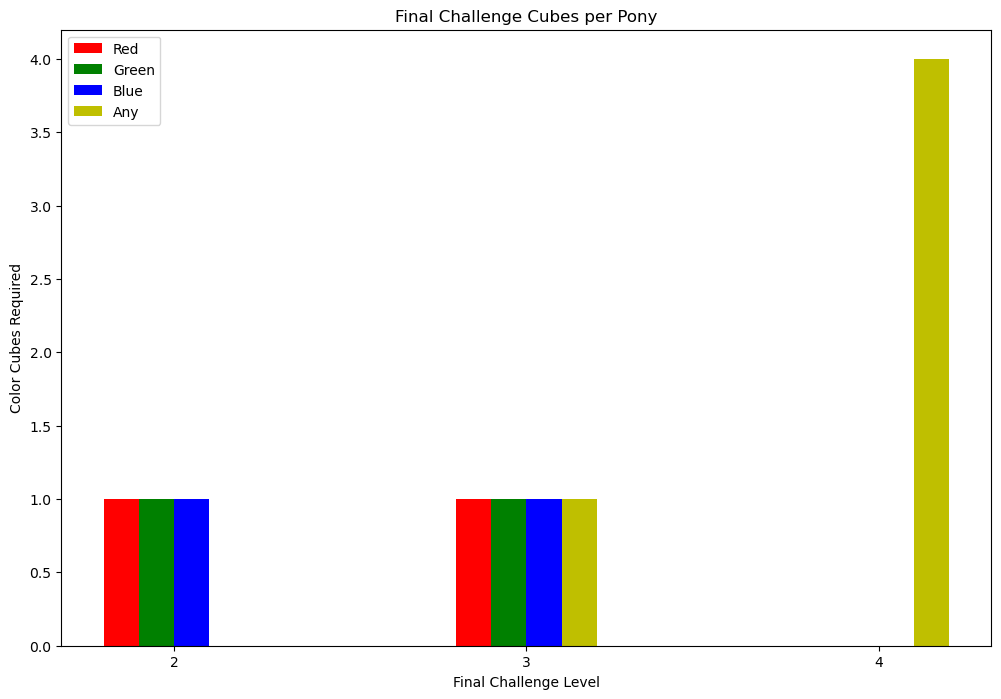

In [1]:
# jupyter nbconvert --no-input --to pdf MLP/MLP.ipynb

import pandas
import matplotlib.pyplot as plotlib
import math
plotlib.rcParams['figure.figsize'] = [12, 8]
plotlib.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

def parse_mlp(cell,parsing='amount'):
    amounts = []
    kinds = []
    if cell == None or cell == "":
        return None,None
    and_parts = cell.split(', ')
    or_parts = []
    for part in and_parts:
        if '/' in part:
            or_parts += part.split('/')
    parts = and_parts + or_parts
    for part in parts:
        amount = 0
        kind = "None"
        if parsing != 'amount':
            amount = 1
            kind = part
        else:
            amount,kind = part.split(' ',1)
        amounts.append(int(amount))
        kinds.append(kind)      
    return amounts, kinds

challenges = pandas.read_csv('data/MLP Adventures Card Distribution - Final Challenge.csv')

levels = {
}
for index,row in challenges.iterrows():
    if not row['Level'] in levels:
        levels[row['Level']] = {
            'red': [],
            'green': [],
            'blue': [],
            'any': []
        }
    if not row['Set'] in levels:
        levels[row['Set']] = {
            'red': [],
            'green': [],
            'blue': [],
            'any': []
        }
    amounts,kinds = parse_mlp(row['Per Pony Cost'])
    for ii in range(0,len(amounts)):
        amount = amounts[ii]
        kind = kinds[ii]
        levels[row['Level']]['red'].append(amount if kind == 'Red Cube' else 0)
        levels[row['Level']]['green'].append(amount if kind == 'Green Cube' else 0)
        levels[row['Level']]['blue'].append(amount if kind == 'Blue Cube' else 0)
        levels[row['Level']]['any'].append(amount if kind == 'Cube' else 0)        

data_levels = challenges['Level'].unique().tolist()
reds = []
greens = []
blues = []
anys = []
for level in data_levels:
    reds.append(math.ceil(sum(levels[level]['red'])/len(levels[level]['red'])))
    greens.append(math.ceil(sum(levels[level]['green'])/len(levels[level]['green'])))
    blues.append(math.ceil(sum(levels[level]['blue'])/len(levels[level]['blue'])))
    anys.append(math.ceil(sum(levels[level]['any'])/len(levels[level]['any'])))

bar_width = 0.1

plotlib.figure()
plotlib.title('Final Challenge Cubes per Pony')
plotlib.bar([x - .15 for x in data_levels],reds,label="Red",color='r',width=bar_width)
plotlib.bar([x - .05 for x in data_levels],greens,label="Green",color='g',width=bar_width)
plotlib.bar([x + .05 for x in data_levels],blues,label='Blue',color='b',width=bar_width)
plotlib.bar([x + .15 for x in data_levels],anys,label='Any',color='y',width=bar_width)
plotlib.legend(loc='best')
plotlib.xticks([2, 3, 4])
plotlib.xlabel('Final Challenge Level')
plotlib.ylabel('Color Cubes Required')
plotlib.show()

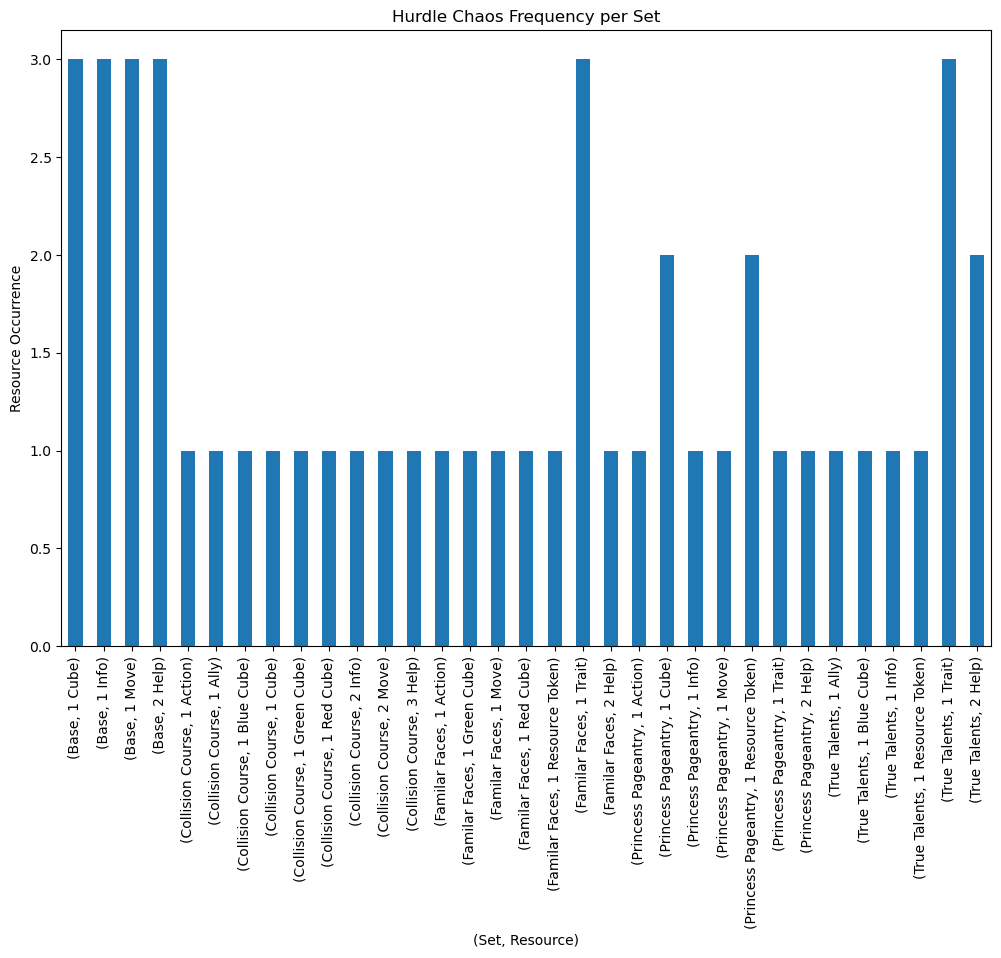

In [2]:
hurdles = pandas.read_csv('data/MLP Adventures Card Distribution - Hurdle.csv')
plotlib.figure()
chaos_counts = hurdles.groupby('Set')['Chaos'].value_counts().sort_index().plot(kind='bar',title='Hurdle Chaos Frequency per Set')
plotlib.ylabel('Resource Occurrence')
plotlib.xlabel('(Set, Resource)')
plotlib.show()

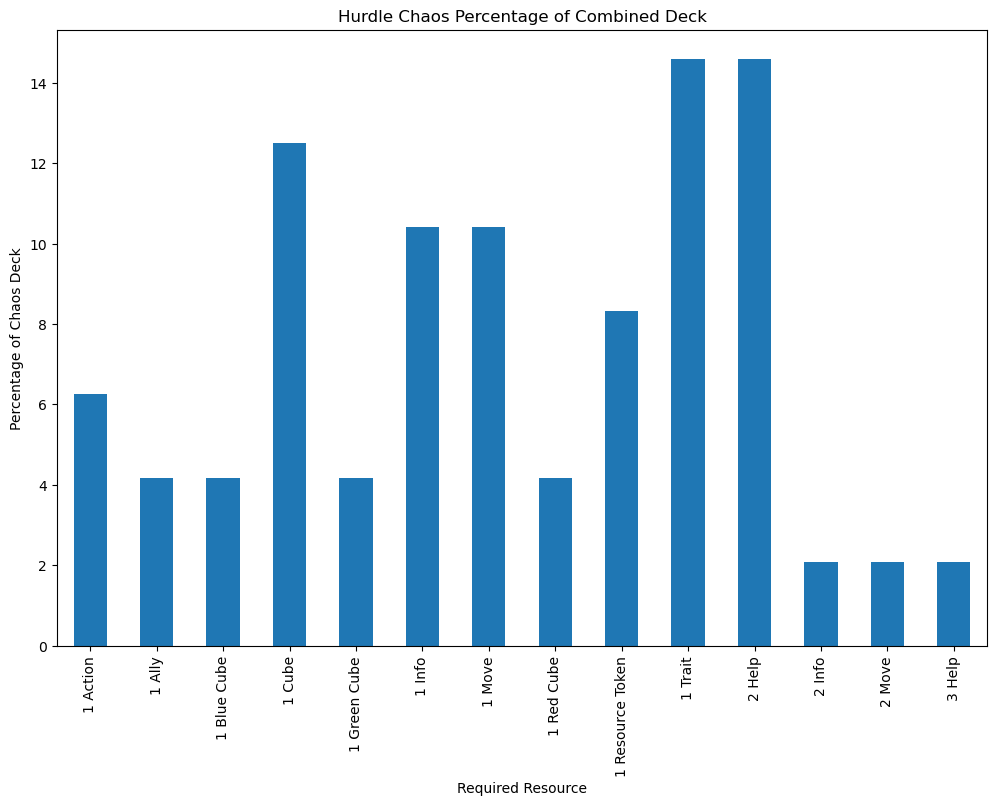

In [3]:
plotlib.figure()
(hurdles['Chaos'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar',title='Hurdle Chaos Percentage of Combined Deck')
plotlib.xlabel("Required Resource")
plotlib.ylabel("Percentage of Chaos Deck")
plotlib.show()

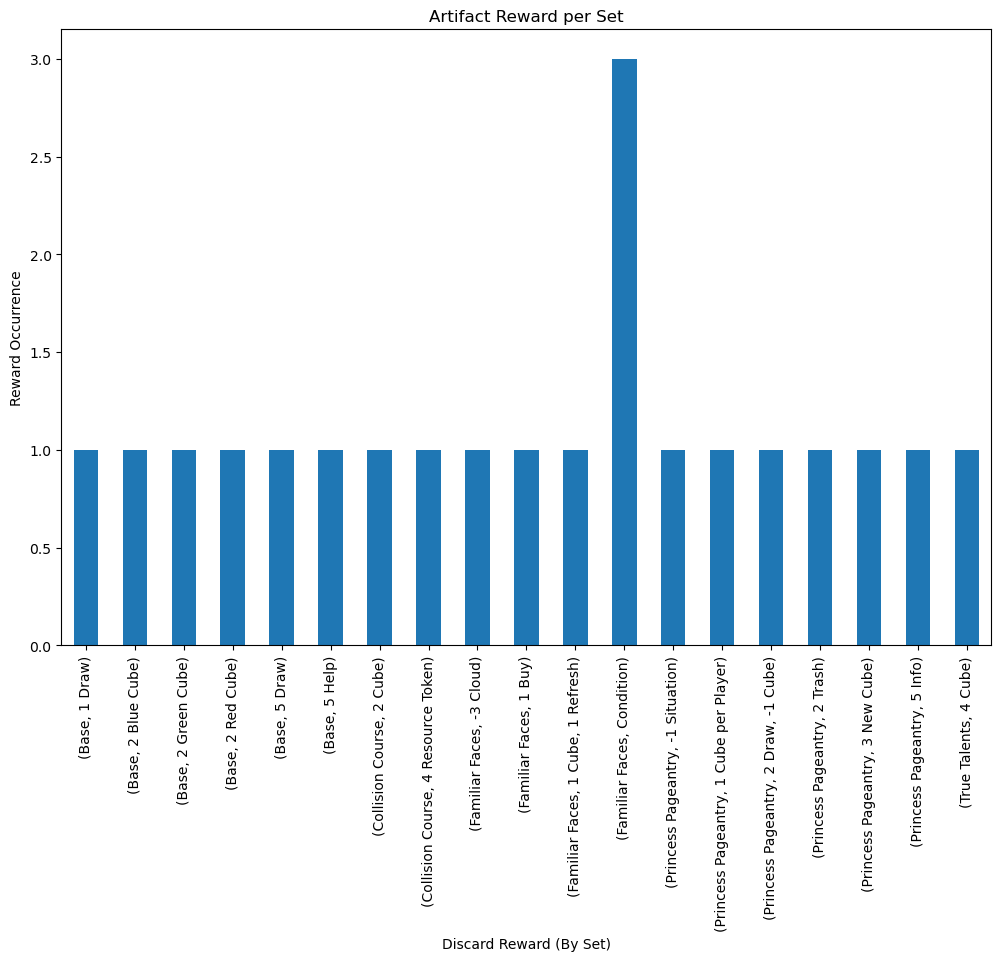

In [4]:
artifacts = pandas.read_csv('data/MLP Adventures Card Distribution - Artifact.csv')
plotlib.figure()
artifacts.groupby('Set')['Reward'].value_counts().sort_index().plot(kind='bar',title='Artifact Reward per Set')
plotlib.xlabel("Discard Reward (By Set)")
plotlib.ylabel("Reward Occurrence")
plotlib.show()

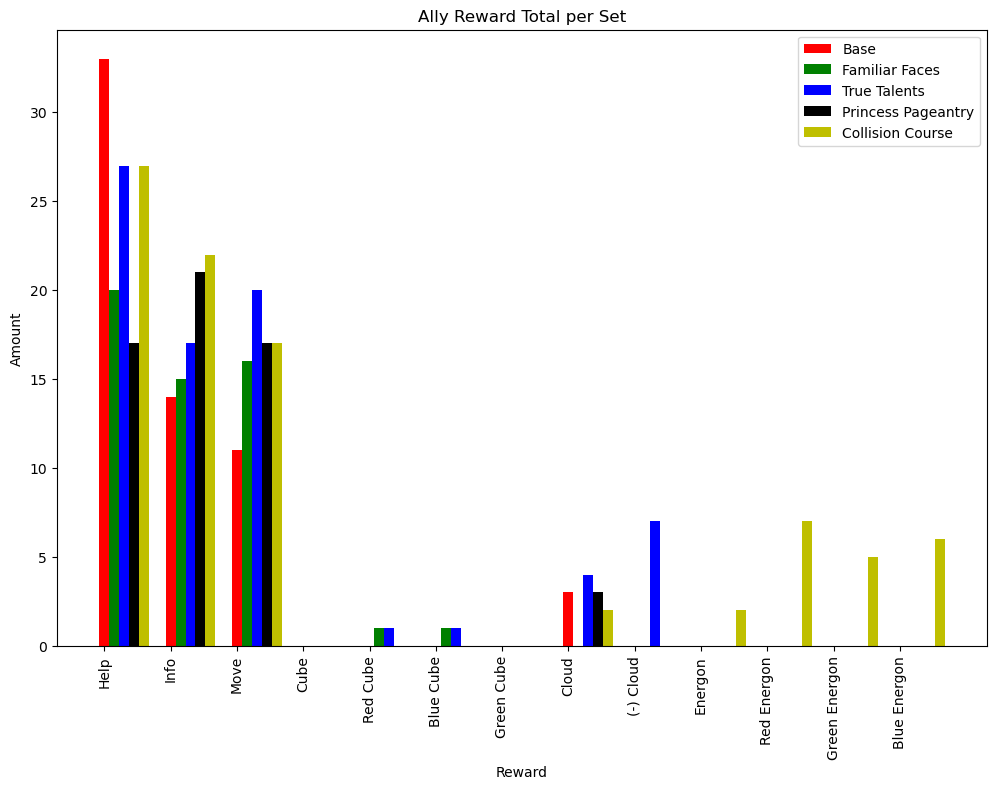

In [5]:
allies = pandas.read_csv('data/MLP Adventures Card Distribution - Ally.csv')
ally_sets = {}
for index,row in allies.iterrows():
    if not row['Set'] in ally_sets:
        ally_sets[row['Set']] = {}
    if pandas.isna(row['Reward']):
        continue
    amounts,kinds = parse_mlp(row['Reward'])
    for ii in range(0,len(amounts)):
        amount = amounts[ii]
        kind = kinds[ii]
        if not kind in ally_sets[row['Set']]:
            ally_sets[row['Set']][kind] = 0
        if kind == 'Cloud' and amount < 0:
            if not '(-) Cloud' in  ally_sets[row['Set']]:
                 ally_sets[row['Set']]['(-) Cloud'] = 0
            ally_sets[row['Set']]['(-) Cloud'] += abs(amount * row['Copies'])
        else:
            ally_sets[row['Set']][kind] += amount * row['Copies']

def get_series(mlp_set,sets):
    keys = []
    values = []
    for k,v in sets[mlp_set].items():
        keys.append(k)
    keys.sort()
    for key in keys:
        values.append(sets[mlp_set][key])
    return keys,values
ally_names = allies['Set'].unique().tolist()
ally_rewards = []
ally_keys=[
    'Help',
    'Info',
    'Move',
    'Cube',
    'Red Cube',
    'Blue Cube',
    'Green Cube',
    'Cloud',
    '(-) Cloud',
    'Energon',
    'Red Energon',
    'Green Energon',
    'Blue Energon'
]
for ally_name in ally_names:
    keys,vals = get_series(ally_name, ally_sets)

for ally_name in ally_names:
    rewards = []
    for ally_key in ally_keys:
        if ally_key in ally_sets[ally_name]:
            rewards.append(ally_sets[ally_name][ally_key])
        else:
            rewards.append(0)
    ally_rewards.append(rewards)
plotlib.figure()
plotlib.title('Ally Reward Total per Set')
bar_width = .15
colors = ['r','g','b','k','y']
import numpy
ind = numpy.arange(len(ally_keys))
for ii in range(0,len(ally_names)):
    plotlib.bar(ind+bar_width*ii,ally_rewards[ii],label=ally_names[ii],color=colors[ii],width=bar_width)
plotlib.legend(loc='best')
plotlib.xlabel('Reward')
plotlib.ylabel('Amount')
plotlib.xticks(ind,ally_keys,rotation=90)
plotlib.show()

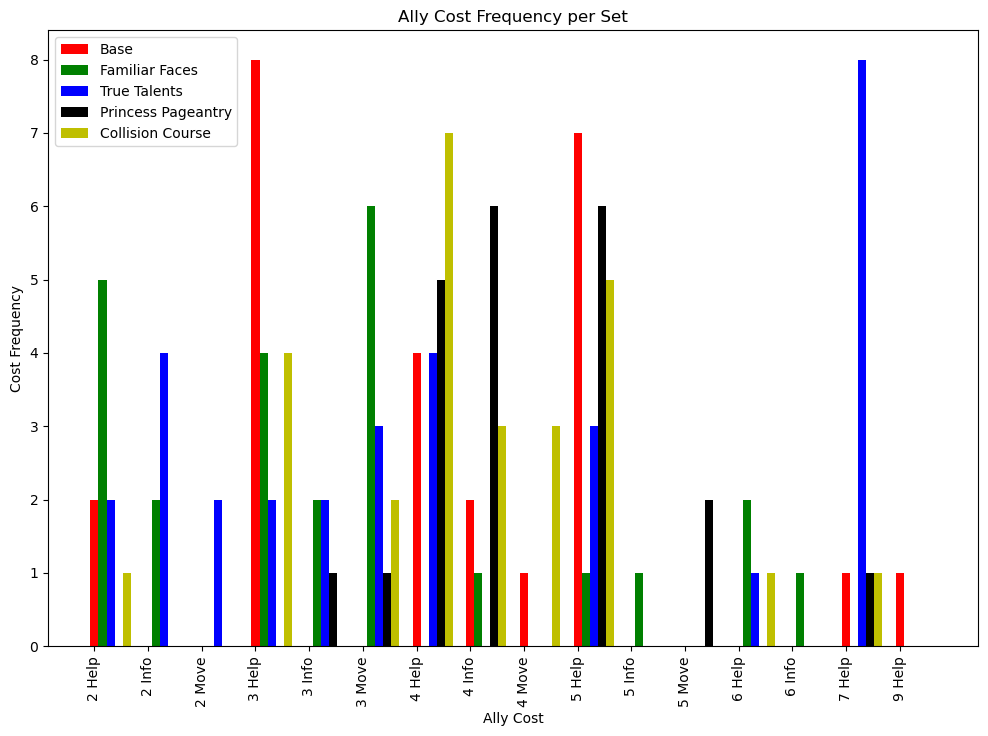

In [20]:
allies = pandas.read_csv('data/MLP Adventures Card Distribution - Ally.csv')
ally_sets = {}
ally_keys = []
for index,row in allies.iterrows():
    if not row['Set'] in ally_sets:
        ally_sets[row['Set']] = {}
    if pandas.isna(row['Cost']):
        continue
    amounts,kinds = parse_mlp(row['Cost'],'whole')
    for ii in range(0,len(amounts)):
        amount = amounts[ii]
        kind = kinds[ii]
        if not kind in ally_keys:
            ally_keys.append(kind)
        if not kind in ally_sets[row['Set']]:
            ally_sets[row['Set']][kind] = 0
        if kind == 'Cloud' and amount < 0:
            if not '(-) Cloud' in  ally_sets[row['Set']]:
                 ally_sets[row['Set']]['(-) Cloud'] = 0
            ally_sets[row['Set']]['(-) Cloud'] += abs(amount * row['Copies'])
        else:
            ally_sets[row['Set']][kind] += amount * row['Copies']

def get_series(mlp_set,sets):
    keys = []
    values = []
    for k,v in sets[mlp_set].items():
        keys.append(k)
    keys.sort()
    for key in keys:
        values.append(sets[mlp_set][key])
    return keys,values
ally_names = allies['Set'].unique().tolist()
ally_rewards = []
ally_keys.sort()
for ally_name in ally_names:
    keys,vals = get_series(ally_name, ally_sets)

for ally_name in ally_names:
    rewards = []
    for ally_key in ally_keys:
        if ally_key in ally_sets[ally_name]:
            rewards.append(ally_sets[ally_name][ally_key])
        else:
            rewards.append(0)
    ally_rewards.append(rewards)
plotlib.figure()
plotlib.title('Ally Cost Frequency per Set')
bar_width = .15
colors = ['r','g','b','k','y']
import numpy
ind = numpy.arange(len(ally_keys))
for ii in range(0,len(ally_names)):
    plotlib.bar(ind+bar_width*ii,ally_rewards[ii],label=ally_names[ii],color=colors[ii],width=bar_width)
plotlib.legend(loc='best')
plotlib.xlabel('Ally Cost')
plotlib.ylabel('Cost Frequency')
plotlib.xticks(ind,ally_keys,rotation=90)
plotlib.show()

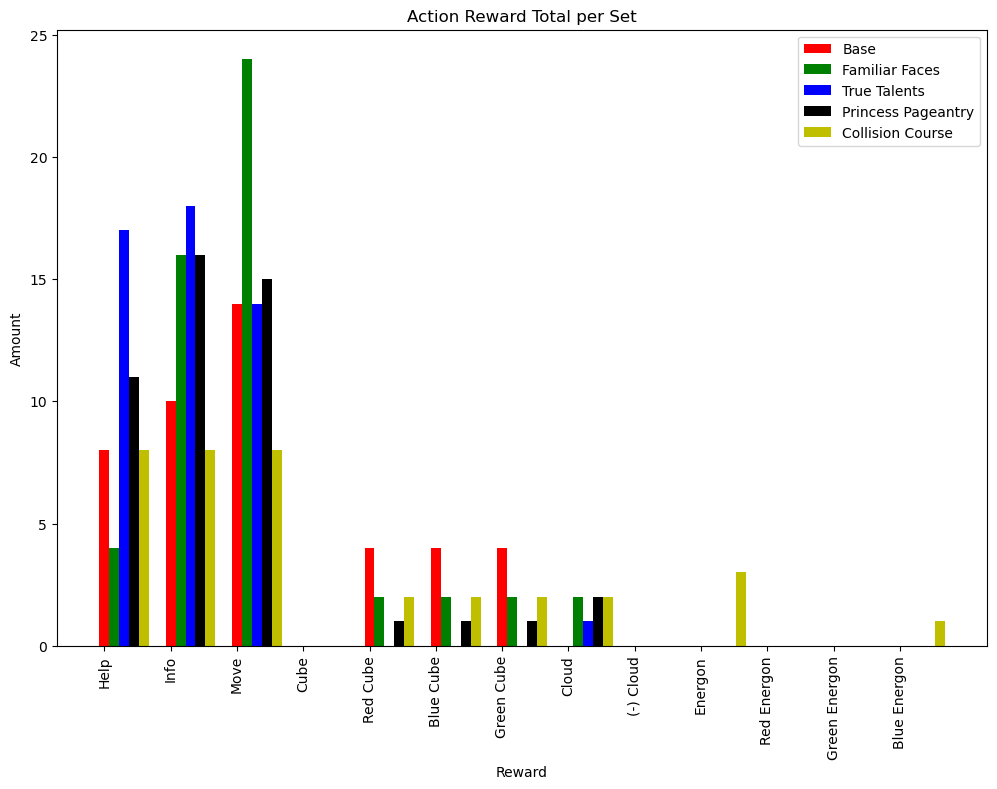

In [6]:
actions = pandas.read_csv('data/MLP Adventures Card Distribution - Action.csv')
action_sets = {}
for index,row in actions.iterrows():
    if not row['Set'] in action_sets:
        action_sets[row['Set']] = {}
    if pandas.isna(row['Reward']):
        continue
    amounts,kinds = parse_mlp(row['Reward'])
    for ii in range(0,len(amounts)):
        amount = amounts[ii]
        kind = kinds[ii]
        if not kind in action_sets[row['Set']]:
            action_sets[row['Set']][kind] = 0
        if kind == 'Cloud' and amount < 0:
            if not '(-) Cloud' in  action_sets[row['Set']]:
                 action_sets[row['Set']]['(-) Cloud'] = 0
            action_sets[row['Set']]['(-) Cloud'] += amount * row['Copies']
        else:
            action_sets[row['Set']][kind] += amount * row['Copies']

action_names = allies['Set'].unique().tolist()
action_rewards = []
action_keys=[
    'Help',
    'Info',
    'Move',
    'Cube',
    'Red Cube',
    'Blue Cube',
    'Green Cube',
    'Cloud',
    '(-) Cloud',
    'Energon',
    'Red Energon',
    'Green Energon',
    'Blue Energon'
]

for action_name in action_names:
    rewards = []
    for action_key in action_keys:
        if action_key in action_sets[action_name]:
            rewards.append(action_sets[action_name][action_key])
        else:
            rewards.append(0)
    action_rewards.append(rewards)
plotlib.figure()
plotlib.title('Action Reward Total per Set')
bar_width = .15
colors = ['r','g','b','k','y']
import numpy
ind = numpy.arange(len(action_keys))
for ii in range(0,len(action_names)):
    plotlib.bar(ind+bar_width*ii,action_rewards[ii],label=action_names[ii],color=colors[ii],width=bar_width)
plotlib.legend(loc='best')
plotlib.xlabel('Reward')
plotlib.ylabel('Amount')
plotlib.xticks(ind,action_keys,rotation=90)
plotlib.show()

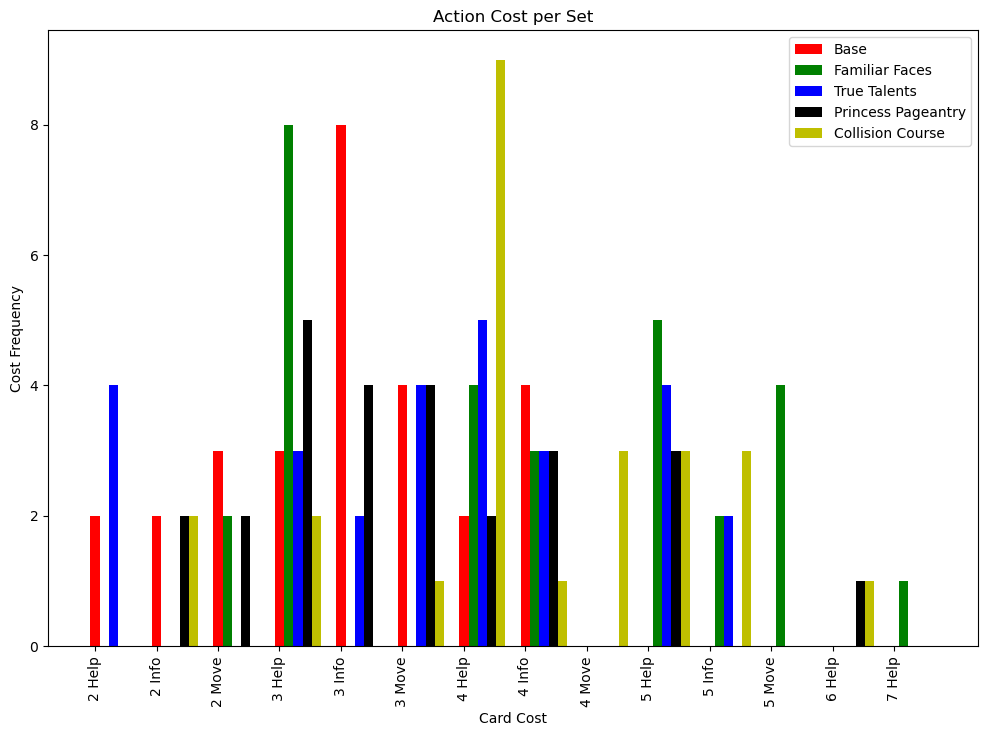

In [18]:
actions = pandas.read_csv('data/MLP Adventures Card Distribution - Action.csv')
action_sets = {}
lookup_keys = []
for index,row in actions.iterrows():
    if not row['Set'] in action_sets:
        action_sets[row['Set']] = {}
    if pandas.isna(row['Cost']):
        continue
    amounts,kinds = parse_mlp(row['Cost'],'whole')
    for ii in range(0,len(amounts)):
        amount = amounts[ii]
        kind = kinds[ii]
        if not kind in lookup_keys:
            lookup_keys.append(kind)
        if not kind in action_sets[row['Set']]:
            action_sets[row['Set']][kind] = 0
        if kind == 'Cloud' and amount < 0:
            if not '(-) Cloud' in  action_sets[row['Set']]:
                 action_sets[row['Set']]['(-) Cloud'] = 0
            action_sets[row['Set']]['(-) Cloud'] += amount * row['Copies']
        else:
            action_sets[row['Set']][kind] += amount * row['Copies']

action_names = allies['Set'].unique().tolist()
action_rewards = []
action_keys=lookup_keys
action_keys.sort()

for action_name in action_names:
    rewards = []
    for action_key in action_keys:
        if action_key in action_sets[action_name]:
            rewards.append(action_sets[action_name][action_key])
        else:
            rewards.append(0)
    action_rewards.append(rewards)
plotlib.figure()
plotlib.title('Action Cost Frequency per Set')
bar_width = .15
colors = ['r','g','b','k','y']
import numpy
ind = numpy.arange(len(action_keys))
for ii in range(0,len(action_names)):
    plotlib.bar(ind+bar_width*ii,action_rewards[ii],label=action_names[ii],color=colors[ii],width=bar_width)
plotlib.legend(loc='best')
plotlib.xlabel('Card Cost')
plotlib.ylabel('Cost Frequency')
plotlib.xticks(ind,action_keys,rotation=90)
plotlib.show()

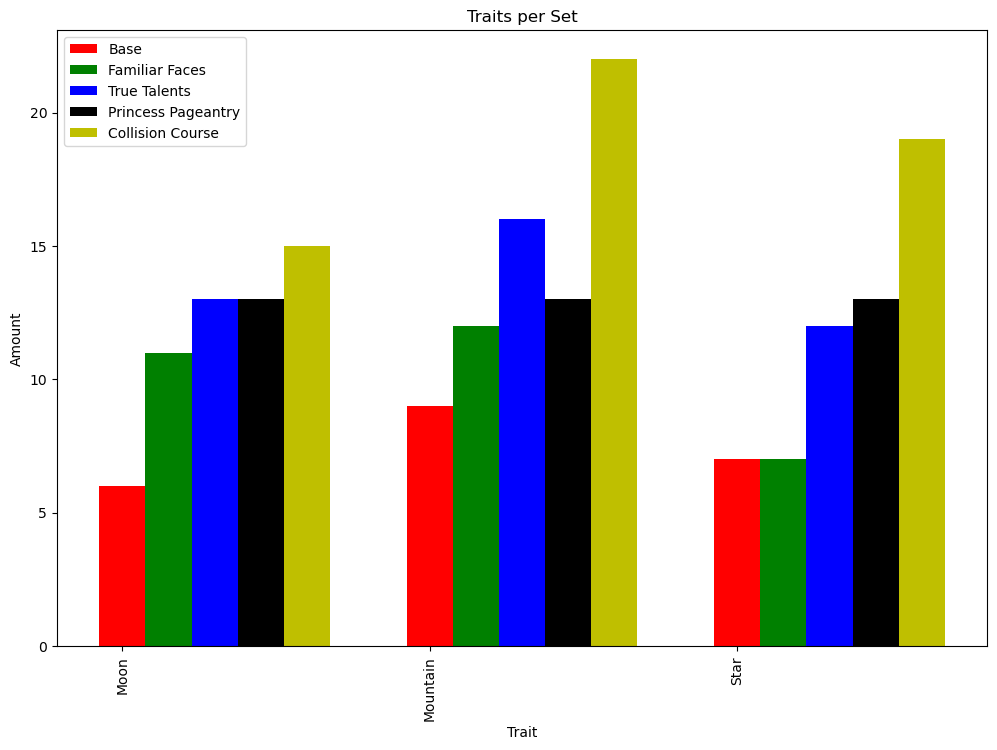

In [7]:
traits = pandas.read_csv('data/MLP Adventures Card Distribution - Ally.csv')
trait_sets = {}
for index,row in traits.iterrows():
    if not row['Set'] in trait_sets:
        trait_sets[row['Set']] = {}
    if pandas.isna(row['Trait']):
        continue
    amounts,kinds = parse_mlp(row['Trait'],'trait')
    for ii in range(0,len(amounts)):
        amount = amounts[ii]
        kind = kinds[ii]
        if amount != None and not kind in trait_sets[row['Set']]:
            trait_sets[row['Set']][kind] = 0
        trait_sets[row['Set']][kind] += amount * row['Copies']
trait_names = allies['Set'].unique().tolist()
ally_traits = []
trait_keys=[
    'Moon',
    'Mountain',
    'Star'
]

for trait_name in trait_names:
    traits = []
    for trait_key in trait_keys:
        if trait_key in trait_sets[trait_name]:
            traits.append(trait_sets[trait_name][trait_key])
        else:
            traits.append(0)
    ally_traits.append(traits)
plotlib.figure()
plotlib.title('Traits per Set')
bar_width = .15
colors = ['r','g','b','k','y']
import numpy
ind = numpy.arange(len(trait_keys))
for ii in range(0,len(trait_names)):
    plotlib.bar(ind+bar_width*ii,ally_traits[ii],label=trait_names[ii],color=colors[ii],width=bar_width)
plotlib.legend(loc='best')
plotlib.xlabel('Trait')
plotlib.ylabel('Amount')
plotlib.xticks(ind,trait_keys,rotation=90)
plotlib.show()

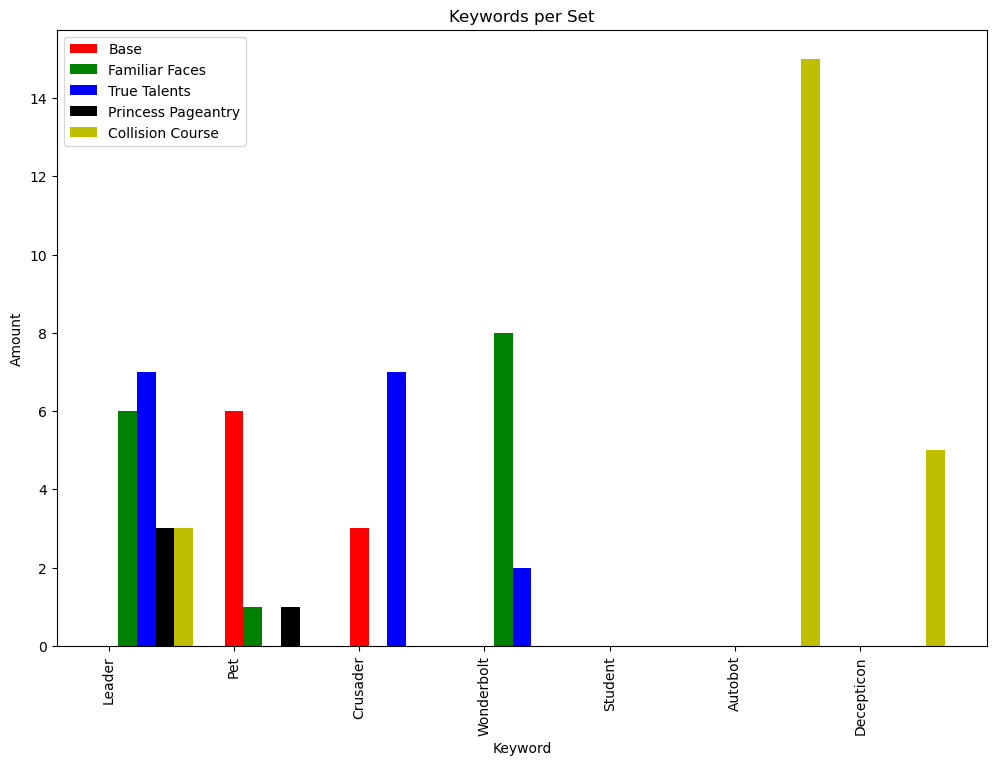

In [8]:
keywords = pandas.read_csv('data/MLP Adventures Card Distribution - Ally.csv')
keyword_sets = {}
for index,row in keywords.iterrows():
    if not row['Set'] in keyword_sets:
        keyword_sets[row['Set']] = {}
    if pandas.isna(row['Keyword']):
        continue
    amounts,kinds = parse_mlp(row['Keyword'],'keyword')
    for ii in range(0,len(amounts)):
        amount = amounts[ii]
        kind = kinds[ii]
        if amount != None and not kind in keyword_sets[row['Set']]:
            keyword_sets[row['Set']][kind] = 0
        keyword_sets[row['Set']][kind] += amount * row['Copies']
keyword_names = allies['Set'].unique().tolist()
ally_keywords = []
keyword_keys=[
    'Leader',
    'Pet',
    'Crusader',
    'Wonderbolt',
    'Student',
    'Autobot',
    'Decepticon'
]

for keyword_name in keyword_names:
    keywords = []
    for keyword_key in keyword_keys:
        if keyword_key in keyword_sets[keyword_name]:
            keywords.append(keyword_sets[keyword_name][keyword_key])
        else:
            keywords.append(0)
    ally_keywords.append(keywords)
plotlib.figure()
plotlib.title('Keywords per Set')
bar_width = .15
colors = ['r','g','b','k','y']
import numpy
ind = numpy.arange(len(keyword_keys))
for ii in range(0,len(keyword_names)):
    plotlib.bar(ind+bar_width*ii,ally_keywords[ii],label=keyword_names[ii],color=colors[ii],width=bar_width)
plotlib.legend(loc='best')
plotlib.xlabel('Keyword')
plotlib.ylabel('Amount')
plotlib.xticks(ind,keyword_keys,rotation=90)
plotlib.show()

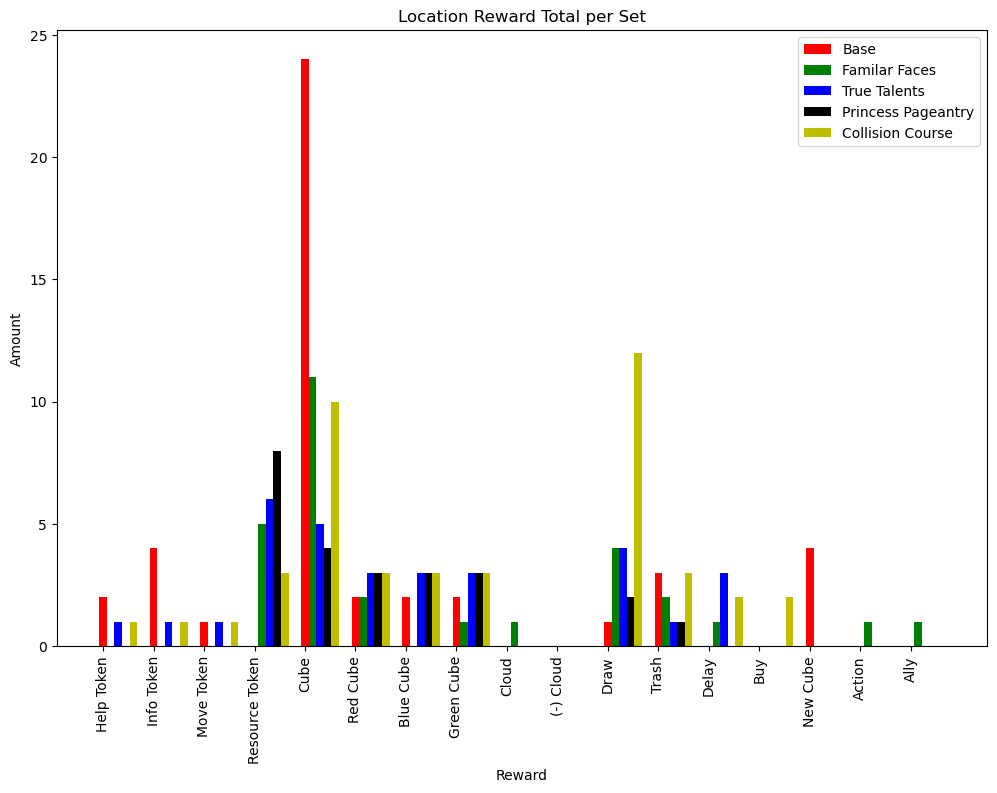

In [9]:
locations = pandas.read_csv('data/MLP Adventures Card Distribution - Location.csv')
location_sets = {}
for index,row in locations.iterrows():
    if not row['Set'] in location_sets:
        location_sets[row['Set']] = {}
    if pandas.isna(row['Task 1 Reward']) or pandas.isna(row['Task 2 Reward']) or pandas.isna(row['Task 3 Reward']):
        continue
    amounts1,kinds1 = parse_mlp(row['Task 1 Reward'])
    amounts2,kinds2 = parse_mlp(row['Task 2 Reward'])
    amounts3,kinds3 = parse_mlp(row['Task 3 Reward'])
    amounts = amounts1 + amounts2 + amounts3
    kinds = kinds1 + kinds2 + kinds3
    for ii in range(0,len(amounts)):
        amount = amounts[ii]
        kind = kinds[ii]
        if not kind in location_sets[row['Set']]:
            location_sets[row['Set']][kind] = 0
        if kind == 'Cloud' and amount < 0:
            if not '(-) Cloud' in  location_sets[row['Set']]:
                 location_sets[row['Set']]['(-) Cloud'] = 0
            location_sets[row['Set']]['(-) Cloud'] += amount
        else:
            location_sets[row['Set']][kind] += amount

location_names = locations['Set'].unique().tolist()
location_rewards = []
location_keys=[
    'Help Token',
    'Info Token',
    'Move Token',
    'Resource Token',
    'Cube',
    'Red Cube',
    'Blue Cube',
    'Green Cube',
    'Cloud',
    '(-) Cloud',
    'Draw',
    'Trash',
    'Delay',
    'Buy',
    'New Cube',
    'Action',
    'Ally'
]

for location_name in location_names:
    rewards = []
    for location_key in location_keys:
        if location_key in location_sets[location_name]:
            rewards.append(location_sets[location_name][location_key])
        else:
            rewards.append(0)
    location_rewards.append(rewards)
plotlib.figure()
plotlib.title('Location Reward Total per Set')
bar_width = .15
colors = ['r','g','b','k','y']
import numpy
ind = numpy.arange(len(location_keys))
for ii in range(0,len(location_names)):
    plotlib.bar(ind+bar_width*ii,location_rewards[ii],label=location_names[ii],color=colors[ii],width=bar_width)
plotlib.legend(loc='best')
plotlib.xlabel('Reward')
plotlib.ylabel('Amount')
plotlib.xticks(ind,location_keys,rotation=90)
plotlib.show()

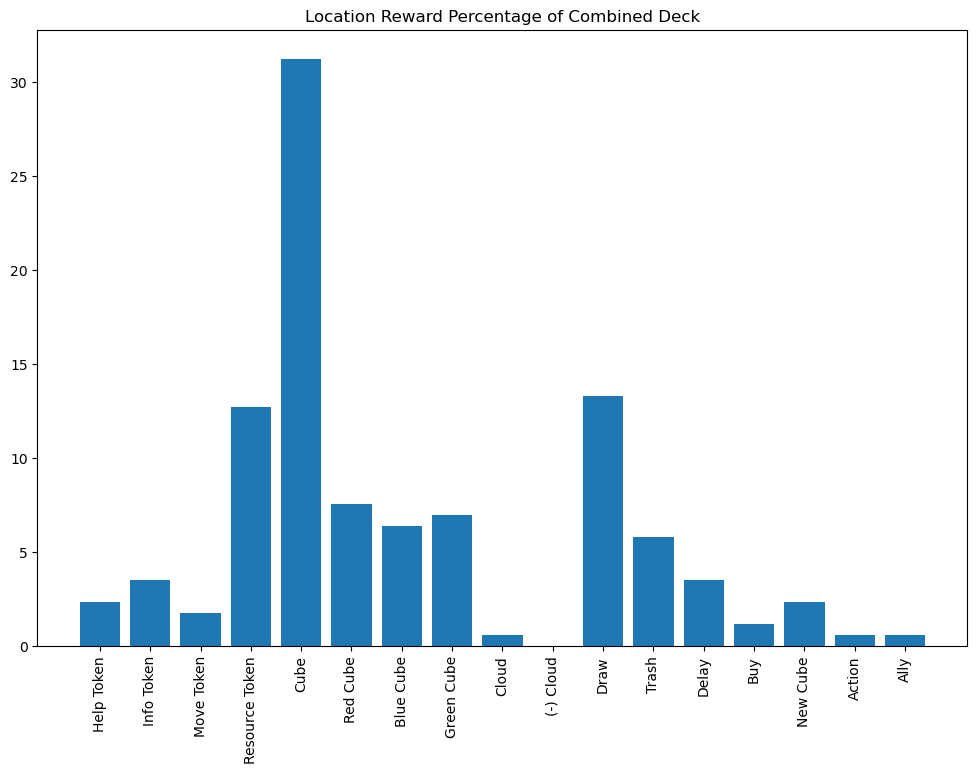

In [12]:
location_totals = [sum(x) for x in zip(*location_rewards)]
locations_total = sum(location_totals)
location_percents = [100*(x/locations_total) for x in location_totals]
plotlib.figure()
plotlib.title('Location Reward Percentage of Combined Deck')
plotlib.bar(ind,location_percents)
ind = numpy.arange(len(location_keys))
plotlib.xticks(ind,location_keys,rotation=90)
plotlib.show()